# Preparação do ambiente

In [ ]:
!pip install pretty-confusion-matrix
!pip install matplotlib --version=3.0.2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from imblearn.combine import SMOTEENN 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from pretty_confusion_matrix import pp_matrix_from_data

# Info

In [3]:
df  = pd.read_csv("/content/Car Insurance dataset.csv")
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [4]:
#Vizualização simplória dos tipos de dados e da quantidade de variáveis que o dataset possui 
#Sem valores nulos, com um total de 58592 amostras
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
#Quantidade de cidades onde os dados foram coletados
df["population_density"].nunique()

22

In [6]:
#Quantidade de modelos dos carros
df["model"].nunique()

11

# Preprocessamento

In [7]:
#Transformando valores Sim e Não em booleanos
df = df.replace({ "No" : False , "Yes" : True })

#Remoção da coluna policy_id
df.drop(columns = "policy_id", inplace = True)

**Codificação das variáveis do tipo "object" utilizando a função get_dummies**

In [8]:
#Passando o dataframe para uma nova variável para que não atrapalhe na análise exploratória
categorical_cols = df.select_dtypes(include=['object']).columns

dff = pd.get_dummies(df, columns=categorical_cols)

In [9]:
dff.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 111 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    policy_tenure                          float64
 1    age_of_car                             float64
 2    age_of_policyholder                    float64
 3    population_density                     int64  
 4    make                                   int64  
 5    airbags                                int64  
 6    is_esc                                 bool   
 7    is_adjustable_steering                 bool   
 8    is_tpms                                bool   
 9    is_parking_sensors                     bool   
 10   is_parking_camera                      bool   
 11   displacement                           int64  
 12   cylinder                               int64  
 13   gear_box                               int64  
 14   turning_radius                      

In [10]:
X = dff.drop(columns = "is_claim")
y = dff["is_claim"]

**Classes target antes do balanceamento**

In [11]:
len(y)

58592

In [12]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_claim', ylabel='count'>

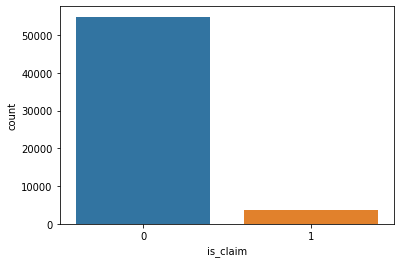

In [13]:
sns.countplot(dff["is_claim"])

**Aplicação do método de balanceamento SMOTEENN**

In [14]:
smt = SMOTEENN()
X_res, y_res = smt.fit_resample(X, y)

In [15]:
len(y_res)

74130

In [16]:
y_res.value_counts()

1    40876
0    33254
Name: is_claim, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_claim', ylabel='count'>

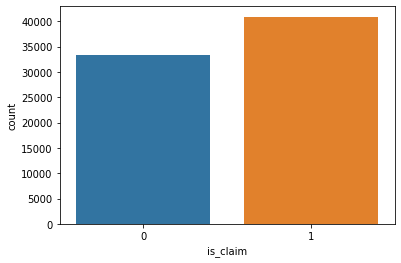

In [17]:
sns.countplot(y_res)

# Modelagem preditiva e avaliação do modelo

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [19]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

preds = classifier.predict(X_test)

In [20]:
accuracy_score(y_test,preds) 

0.9674895453932281

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6610
           1       0.97      0.97      0.97      8216

    accuracy                           0.97     14826
   macro avg       0.97      0.97      0.97     14826
weighted avg       0.97      0.97      0.97     14826



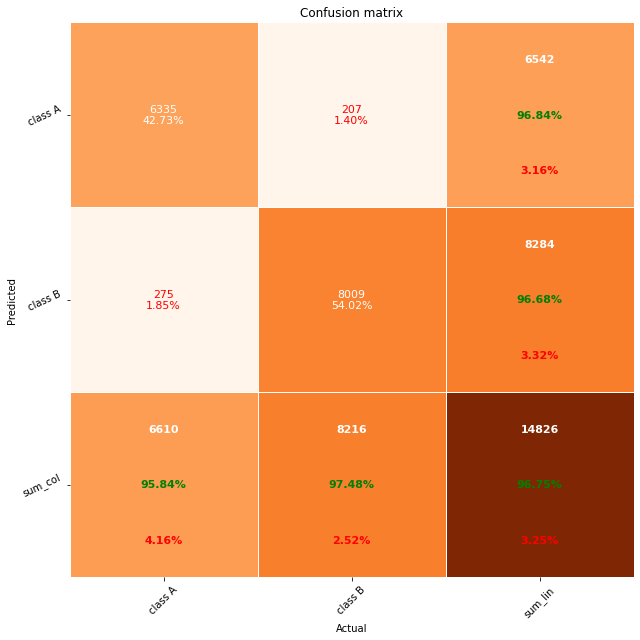

In [22]:
pp_matrix_from_data(y_test, preds)